# Regresión No Lineal Múltiple

Mateo Rosero

## Explicaciones Clave
**Sobre el dataset:** ``Student_Performance.csv`` contiene datos para examinar los factores que influencian el rendimiento académico de un estudiante. Contiene las siguientes variables:
-  Horas Estudiadas (_Hours Studied_)
-  Calificaciones Anteriores (_Previous Scores_)
-  Actividades Extracurriculares Vigentes (_Extracurricular Activities_)
-  Horas de Sueño (_Sleep Hours_)
-  Cantidad de 'Documentos con Preguntas de Prueba' practicados (_Sample Question Papers Practiced_)
-  Índice de Rendimiento Académico del Estudiante (_Performance Index_)

**Importación de datos:** Se asume que el archivo ``Student_Performance.csv`` contiene varias columnas, de las que se usarán:
- _Variables independientes:_ Hours Studied, Previous Scores, Extracurricular Activities, Sleep Hours, Sample Question Papers Practiced
- _Variable dependiente:_ Índice de Rendimiento <br>

**Preprocesamiento:** Se transformará la columna categórica 'Extracurricular Activities' en datos numéricos (``1: Yes``, ``0: No``). <br>
**División del dataset:** Usamos ``train_test_split`` para dividir los datos en entrenamiento (2/3) y prueba (1/3).<br>
**Entrenamiento del modelo:** Utilizamos LinearRegression de sklearn para ajustar un modelo de regresión múltiple.<br>

### Importar las librerías necesarias

In [1]:
import numpy as np  # Para operaciones matemáticas y manejo de matrices
import matplotlib.pyplot as plt  # Para visualización de datos
import pandas as pd  # Para manipulación y análisis de datos

### Importar el Dataset

In [6]:
dataset = pd.read_csv('Student_Performance.csv')

### Reemplazar valores categóricos de la variable 'Extracurricular Activities'

In [7]:
dataset['Extracurricular Activities'] = dataset['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [22]:
pd.DataFrame(dataset['Extracurricular Activities'])

,Extracurricular Activities
0,1
1,0
2,1
3,1
4,0
...,...
9995,1
9996,1
9997,1
9998,1


### Extraer Variables Independientes y Variable Dependiente

In [10]:
# Variables independientes
X = dataset[["Hours Studied", "Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"]].values

# Variable dependiente
y = dataset["Performance Index"].values

Para la Variable Independiente se utiliza doble corchete [[]] porque devuelve un arreglo de 2 dimensiones, dado que la librería scikit-learn espera una matriz de entrada para esta variable, aunque solo tenga una columna.

### Dividir el dataset en conjunto de entrenamiento y conjunto de prueba

In [14]:
from sklearn.model_selection import train_test_split

# Usamos 2/3 para entrenamiento y 1/3 para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

### Entrenar el modelo de Regresión Lineal Múltiple con el conjunto de entrenamiento

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # Crear el modelo de regresión lineal
regressor.fit(X_train, y_train) # Ajustar el modelo a los datos de entrenamiento

LinearRegression()

### Predecir los resultados del conjunto de prueba

In [16]:
y_pred = regressor.predict(X_test) # Generar predicciones para los datos de prueba

### Mostrar comparación entre: _Valores Reales_ vs. _Valores Predichos_

In [28]:
pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred)}).head(10) # Visualizar los primeros 10 datos de los valores actuales y predichos

,Actual,Predicted
0,53.0,50.0
1,50.0,53.0
2,80.0,78.0
3,24.0,25.0
4,64.0,67.0
5,47.0,48.0
6,83.0,83.0
7,56.0,54.0
8,47.0,48.0
9,61.0,62.0


**_ANÁLISIS_** <br>
Aquí podemos observar que la comparación entre valores reales y predichos no varía tanto, pues hay una diferencia de no más de 3 en los datos, por lo que se puede decir que el modelo tiene una capacidad muy alta para estimar la variable dependiente, que es el **Índice de Rendimiento** (_Performance Index_).

### Visualización de Dispersión entre resultados _Reales_ y _Predichos_

Se observarán los resultados arrojados por el Conjunto de Prueba

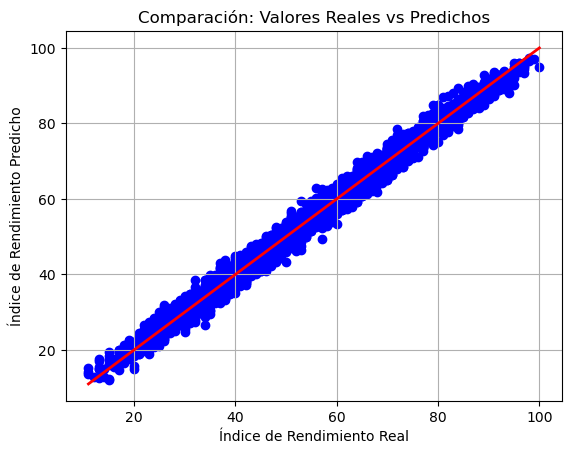

In [30]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Comparación: Valores Reales vs Predichos') # Título del Gráfico
plt.xlabel('Índice de Rendimiento Real') # Etiqueta del Eje X
plt.ylabel('Índice de Rendimiento Predicho') # Etiqueta del Eje Y
plt.grid(True)
plt.show()

### Visualizar los resultados del conjunto de entrenamiento

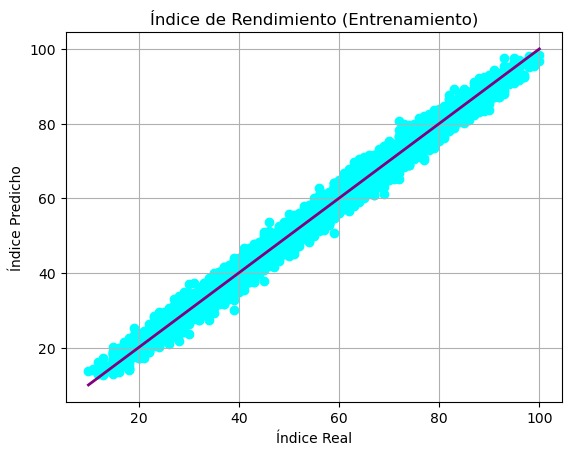

In [29]:
plt.scatter(y_train, regressor.predict(X_train), color='cyan')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='purple', linewidth=2)
plt.title('Índice de Rendimiento (Entrenamiento)') # Título del Gráfico
plt.xlabel('Índice Real') # Etiqueta del Eje X
plt.ylabel('Índice Predicho') # Etiqueta del Eje Y
plt.grid(True)
plt.show()

Existe una mayor dispersión entre sus valores a diferencia del Conjunto de Prueba.

# ANÁLISIS

## Análisis Técnico

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

### Coeficientes del Modelo
En una regresión lineal, indican cuánto cambia la variable objetivo (en este caso, el "_Índice de Rendimiento_") por cada unidad de cambio en una variable independiente, manteniendo las demás constantes. Si el coeficiente es positivo, la variable tiene un impacto directo; si es negativo, el efecto es inverso. <br>
Estos coeficientes nos ayudan a identificar qué factores tienen mayor influencia en el resultado, y se interpretan en el contexto del modelo entrenado.

In [51]:
variables = ['Horas de Estudio (Study Hours)', 'Calificaciones Anteriores (Previous Scores)', 
             'Actividades Extracurriculares (Extracurricular Activities)', 'Horas de Sueño (Sleep Hours)', 
             'Exámenes de Práctica (Sample Question Papers Practiced)']
coeficientes = pd.DataFrame({
    'Variable': variables + ['Intercepto'],
    'Coeficiente': list(regressor.coef_) + [regressor.intercept_]
})
coeficientes

,Variable,Coeficiente
0,Horas de Estudio (Study Hours),2.844439
1,Calificaciones Anteriores (Previous Scores),1.019708
2,Actividades Extracurriculares (Extracurricular...,0.630109
3,Horas de Sueño (Sleep Hours),0.474365
4,Exámenes de Práctica (Sample Question Papers P...,0.185540
5,Intercepto,-34.059481


**_ANÁLISIS_** <br>
- La variable con mayor impacto positivo en el rendimiento académico de un estudiante es **Horas de Estudio**, donde cada hora adicional implica un incremento de 2.84 puntos en el índice.
- La siguiente variable con mayor impacto positivo es **Calificaciones Anteriores**.
- Por otro lado, a pesar de que _Actividades Extracurriculares_, _Horas de Sueño_ o _Exámenes de Práctica_ igualmente tengan efectos positivos, su influencia es menor.
- El _**intercepto**_ de -34.06 sugiere que si todas las variables independientes fueran cero, el rendimiento estimado sería negativo, algo que no siempre tiene sentido práctico.

## Normalidad de los Residuos

Los residuos son las diferencias entre los valores reales y los predichos. Para que un modelo lineal sea confiable, los residuos (también llamados _**errores**_) deben seguir una distribución aproximadamente normal. <br>
Esta característica se analiza _visualmente_, pues, se observa un histograma con una curva que se asemeje a una campana. <br>
- Si la curva está centrada y simétrica (**Mesocúrtica**), la normalidad se cumple.
- Si la curva tiene picos muy altos (**Leptocúrtica**), indica que tiene pocos _outliers_ o valores extremos.
- Si la curva contiene picos no tan altos (**Platicúrtica**), puede indicar una mayor dispersión de datos con respecto a la media, lo cual aumenta la cantidad de _outliers_ identificados.

In [35]:
# Calcular residuos
residuals = y_test - y_pred

C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


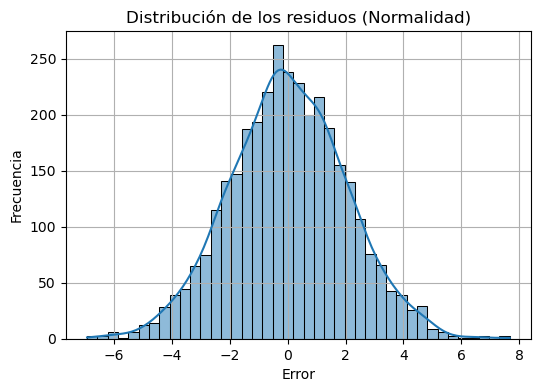

In [36]:
# Normalidad de los residuos (histograma)
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Distribución de los residuos (Normalidad)")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()

**_ANÁLISIS_** <br>
- La distribución de los residuos se asemeja bastante a una **Campana de Gauss**, centrada en cero, y la curva de residuos indica que se puede tratar de una distribución aproximadamente normal y **mesocúrtica**, lo cual sugiere que se cumple el supuesto de normalidad de los errores.
- Esto es una buena señal de que el modelo está bien especificado.

## Homocedasticidad

La homocedasticidad significa que los errores tienen varianza constante a lo largo de los valores predichos, por lo que, en caso de que no se cumpla (_heterocedasticidad_), puede haber problemas en la estimación de los errores estándar. <br>
Para analizar esta característica, se grafican los **Residuos** y los **Valores Predichos**. <br>
- Si los puntos están dispersos de manera uniforme (sin formar abanicos o conos), se cumple la homocedasticidad.

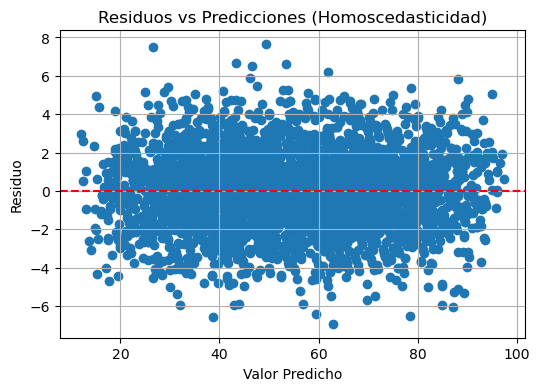

In [37]:
# Homocedasticidad (Residuos vs Predicciones)
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuos vs Predicciones (Homoscedasticidad)")
plt.xlabel("Valor Predicho")
plt.ylabel("Residuo")
plt.grid()
plt.show()

**_ANÁLISIS_** <br>
- El gráfico muestra que la dispersión de los residuos es constante, se forman patrones aleatorios y sin forma de abanico o embudo, lo cual sugiere que se cumple la homocedasticidad.
- Esto significa que el error tiene una varianza constante en todos los niveles de las predicciones.

## Análisis Estadístico

### R Cuadrado

***R²*** es el **Coeficiente de Determinación**, el cual mide el grado en el que el modelo acierta las predicciones de los valores reales. 
- Va de 0 a 1.
- Cuanto más cercano a 1, mejor es el ajuste del modelo.

In [54]:
r2 = r2_score(y_test, y_pred)

print(f"R Cuadrado (Coeficiente de Determinación): {r2:.4f}")

R Cuadrado (Coeficiente de Determinación): 0.9888


**_ANÁLISIS_** <br>
- El valor de R² es _0.9888_, lo cual indica que el modelo predice el rendimiento académico estudiantil con una tasa de aciertos del 98.88%.
- Esto refleja una excelente capacidad predictiva del modelo y sugiere que las variables seleccionadas son altamente relevantes para explicar el fenómeno analizado.

### MAE, MSE & RMSE

Cuando se entrena un modelo de regresión, es necesario medir qué tan bien está prediciendo. Para eso, se usan métricas de error, que comparan lo que el modelo predijo contra lo que realmente ocurrió. <br> 

El ***Error Absoluto Medio (MAE)*** es el promedio de los errores absolutos (diferencias absolutas entre las predicciones y los valores reales). <br>
- Mientras más bajo sea el valor, será mejor la tasa de aciertos de la función.
- No penaliza tanto los errores grandes.
- Es fácil de interpretar, ya que está en las mismas unidades que la variable objetivo. <br>

El ***Error Cuadrático Medio (MSE)*** es el promedio de los errores al cuadrado. <br>
- Penaliza más fuertemente los errores grandes dado que se eleva al cuadrado.
- Es útil si se quiere penalizar más los errores grandes y destacar su impacto.
- Al elevar los errores al cuadrado, pierde interpretabilidad directa, pues ya no está en las mismas unidades. <br>

La ***Raíz del MSE (RMSE)*** es la raíz cuadrada del MSE, por lo tanto:
- Penaliza los errores grandes (como el MSE).
- Vuelve a las mismas unidades que la variable objetivo (como el MAE).
- Por lo tanto, es la métrica más popular, porque equilibra precisión e interpretación. <br> <br>

Estas métricas tienen las siguientes interpretaciones: <br>
- Cuanto menor sea el valor de MAE, MSE o RMSE, mejor está prediciendo el modelo.
- El RMSE suele ser un poco mayor que el MAE, ya que penaliza más los errores grandes.
- Si el RMSE es mucho mayor que el MAE, puede haber _outliers_ o _valores extremos_ afectando el modelo.

In [55]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")

MAE (Error Absoluto Medio): 1.5954
MSE (Error Cuadrático Medio): 4.0392
RMSE (Raíz del Error Cuadrático Medio): 2.0098


**_ANÁLISIS_** <br>

| Métrica | Valor | Interpretación |
|--------|--------|----------------|
| **MAE** | 1.5954 | En promedio, el modelo se equivoca por ±1.60 puntos |
| **MSE** | 4.0392 | Refleja la variabilidad global del error (más sensible a errores grandes) |
| **RMSE** | 2.0098 | Error típico, con penalización a errores grandes
<br>
- El MAE obtenido fue de **1.60**, lo que indica que en promedio el modelo se equivoca por 1.60 puntos al predecir el Índice de Rendimiento.
- El RMSE fue de **2.01**, ligeramente superior al MAE, lo que sugiere que existen algunos errores más grandes, aunque no son dominantes.
- El MSE fue de **4.04**, que al ser un valor al cuadrado, refleja la variabilidad general del error.
En conjunto, estas métricas indican que el modelo tiene una buena precisión, con errores relativamente bajos; sin embargo, podría afinarse más si se identifican y tratan posibles valores atípicos o se optimizan algunas variables predictoras.